In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
# Creating a datetime object
dt = datetime(2022, 3, 9, 12, 30, 0)

# Converting datetime to timestamp
timestamp = dt.timestamp()

print("Datetime Object:", dt)
print("Timestamp:", timestamp)

Datetime Object: 2022-03-09 12:30:00
Timestamp: 1646829000.0


In [ ]:
time_stamp = pd.Timestamp(datetime(2017,1,1))

In [ ]:
time_stamp.year

In [ ]:
# Period

# pd.Period and Frequency

period = pd.Period('2017-01')

In [2]:
# pd.date_time start,end, periods, freq

time_range = pd.date_range(start='2017-1-1',periods=12,freq='M')
time_range

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [3]:
time_range[0]

Timestamp('2017-01-31 00:00:00', freq='M')

In [ ]:
time_range.to_period('D')

In [ ]:
data = np.random.random(size=(12,2))
data

In [ ]:
df = pd.DataFrame(data=data,index=time_range)
df

**Indexing and Resampling Time Series**

- Upsampling - Requires generating new data
- Downsampling - Aggregating data

In [4]:
data = pd.read_csv("/content/google.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [ ]:
data.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [6]:
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1094 non-null   datetime64[ns]
 1   Close   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [8]:
data.set_index('Date',inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [10]:
data.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [11]:
data['Close'].dtype

dtype('float64')

In [12]:
data.index.dtype

dtype('<M8[ns]')

**Visualizing**

<Axes: xlabel='Date'>

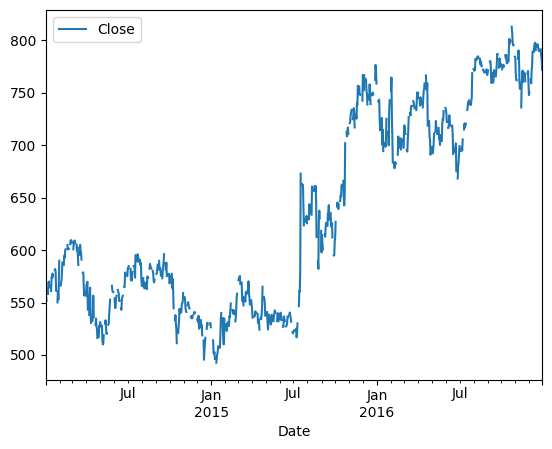

In [13]:
data.plot()

In [14]:
data.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [17]:
data.tail()

,Close
Date,
2016-12-26,NaN
2016-12-27,791.55
2016-12-28,785.05
2016-12-29,782.79
2016-12-30,771.82


In [18]:
# Partial string slicing

data.loc['2015'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


<Axes: xlabel='Date'>

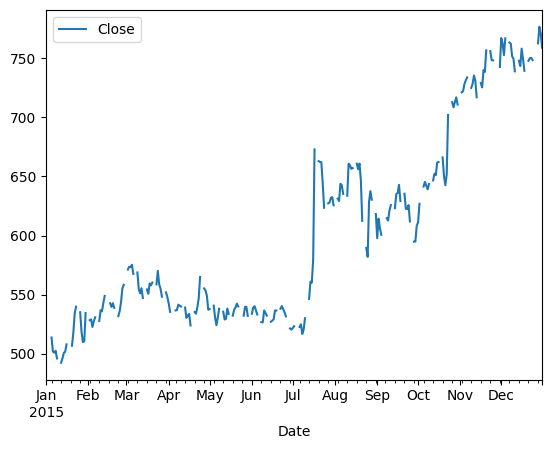

In [19]:
data.loc['2015'].plot()

In [20]:
data.loc['2015':'2016-02'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 425 entries, 2015-01-01 to 2016-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   291 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB


<Axes: xlabel='Date'>

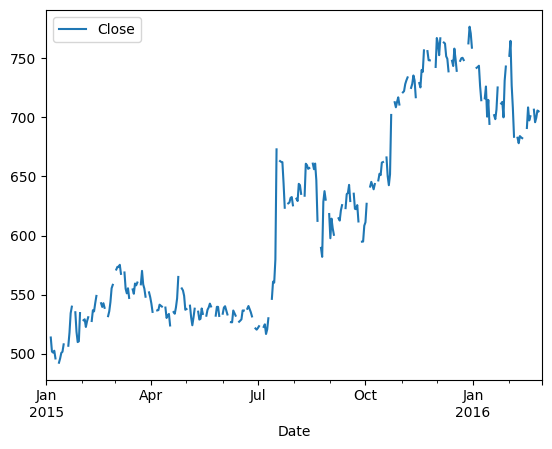

In [21]:
data.loc['2015':'2016-02'].plot()

**Setting frequency.**

- 'D': Calendar daily
- 'B': Business daily
- 'W': Weekly
- 'M': Month end
- 'Q': Quarter end
- 'A': Year end

In [22]:
# Infering the frequency

pd.infer_freq(data.index)

'D'

In [24]:
data.asfreq('M').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2014-01-31 to 2016-11-30
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   25 non-null     float64
dtypes: float64(1)
memory usage: 560.0 bytes


In [25]:
# Setting frequency

data.asfreq('B').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2014-01-02 to 2016-12-30
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


**Lag Values Forward or Backwards**

In [ ]:
data = pd.read_csv('/content/google.csv',parse_dates=['Date'],index_col='Date')
data

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10
...,...
2016-12-26,NaN
2016-12-27,791.55
2016-12-28,785.05


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 49.4 KB


In [ ]:
data.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


- shift()
- moves the data forward 1 period


In [28]:
data['shifted'] = data.Close.shift(periods=1)

In [29]:
data['lagged'] = data.Close.shift(periods=-1)

In [30]:
data.head()

,Close,shifted,lagged
Date,,,
2014-01-02,556.00,NaN,551.95
2014-01-03,551.95,556.00,NaN
2014-01-04,NaN,551.95,NaN
2014-01-05,NaN,NaN,558.10
2014-01-06,558.10,NaN,568.86


**Calculating the percentage return**

In [32]:
# dividing a series by an entire series

data['pct_change'] = data.Close.div(data.shifted)

In [33]:
data['return'] = data['pct_change'].sub(1).mul(100)

In [34]:
data.head(10)

,Close,shifted,lagged,pct_change,return
Date,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN
2014-01-03,551.95,556.00,NaN,0.992716,-0.728417
2014-01-04,NaN,551.95,NaN,NaN,NaN
2014-01-05,NaN,NaN,558.10,NaN,NaN
2014-01-06,558.10,NaN,568.86,NaN,NaN
2014-01-07,568.86,558.10,570.04,1.019280,1.927970
2014-01-08,570.04,568.86,564.55,1.002074,0.207432
2014-01-09,564.55,570.04,564.52,0.990369,-0.963090
2014-01-10,564.52,564.55,NaN,0.999947,-0.005314


**- diff()**

In [ ]:
data['diff'] = data.Close.diff()

**- pct_change()**

In [35]:
data['pct_change_direct'] = data.Close.pct_change().mul(100)

In [36]:
data.head()

,Close,shifted,lagged,pct_change,return,pct_change_direct
Date,,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN,NaN
2014-01-03,551.95,556.00,NaN,0.992716,-0.728417,-0.728417
2014-01-04,NaN,551.95,NaN,NaN,NaN,0.000000
2014-01-05,NaN,NaN,558.10,NaN,NaN,0.000000
2014-01-06,558.10,NaN,568.86,NaN,NaN,1.114231


In [37]:
data['pct_change_direct_per'] = data.Close.pct_change(periods=3).mul(100)

In [39]:
data.head(20)

,Close,shifted,lagged,pct_change,return,pct_change_direct,pct_change_direct_per
Date,,,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN,NaN,NaN
2014-01-03,551.95,556.00,NaN,0.992716,-0.728417,-0.728417,NaN
2014-01-04,NaN,551.95,NaN,NaN,NaN,0.000000,NaN
2014-01-05,NaN,NaN,558.10,NaN,NaN,0.000000,-0.728417
2014-01-06,558.10,NaN,568.86,NaN,NaN,1.114231,1.114231
2014-01-07,568.86,558.10,570.04,1.019280,1.927970,1.927970,3.063683
2014-01-08,570.04,568.86,564.55,1.002074,0.207432,0.207432,3.277471
2014-01-09,564.55,570.04,564.52,0.990369,-0.963090,-0.963090,1.155707
2014-01-10,564.52,564.55,NaN,0.999947,-0.005314,-0.005314,-0.762929
